## Correlation Matrices

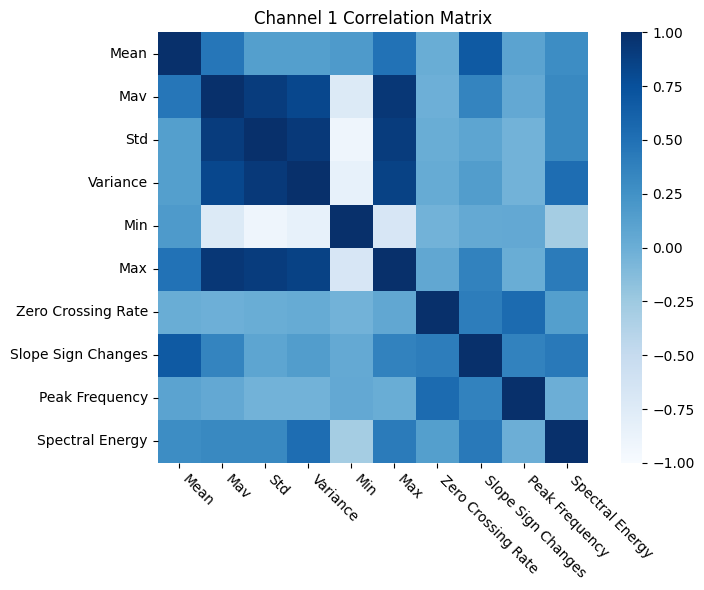

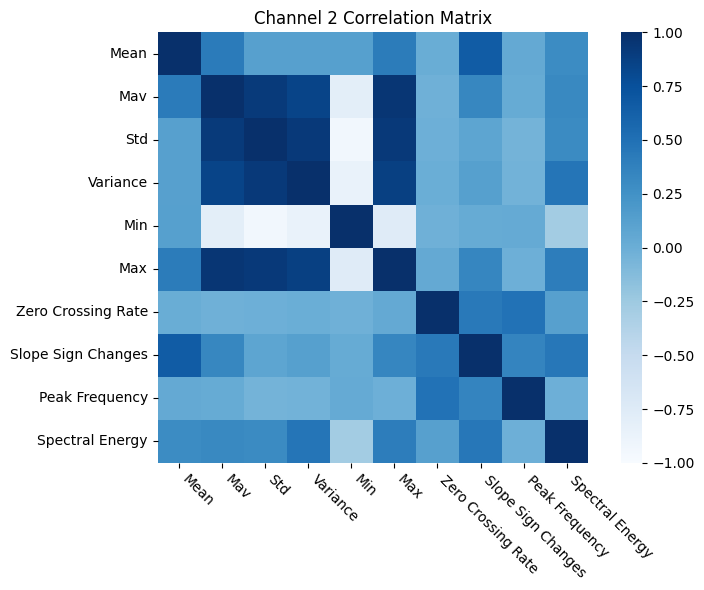

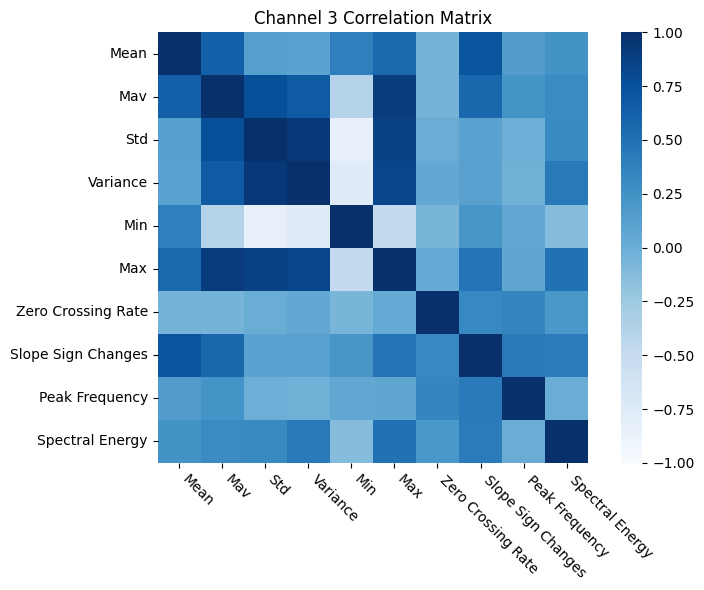

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
os.chdir("..") 
df = pd.read_csv("datasets/features_dataset.csv")
df = df.drop(columns=["material"])

channel_cols = {}
for col in df.columns:
    if col[-1].isdigit():
        channel = int(col[-1])
        channel_cols.setdefault(channel, []).append(col)

for ch, cols in channel_cols.items():
    corr = df[cols].corr()

    labels = [
        " ".join(word.capitalize() for word in col[:-1].replace("_", " ").split()) if col[-1].isdigit() else
        " ".join(word.capitalize() for word in col.replace("_", " ").split())
        for col in cols
    ]
    corr.index = labels
    corr.columns = labels

    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(corr, annot=False, cmap="Blues", vmin=-1, vmax=1,
                     square=True)
    plt.title(f"Channel {ch + 1} Correlation Matrix")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, ha='left')

    plt.tight_layout()
    plt.show()

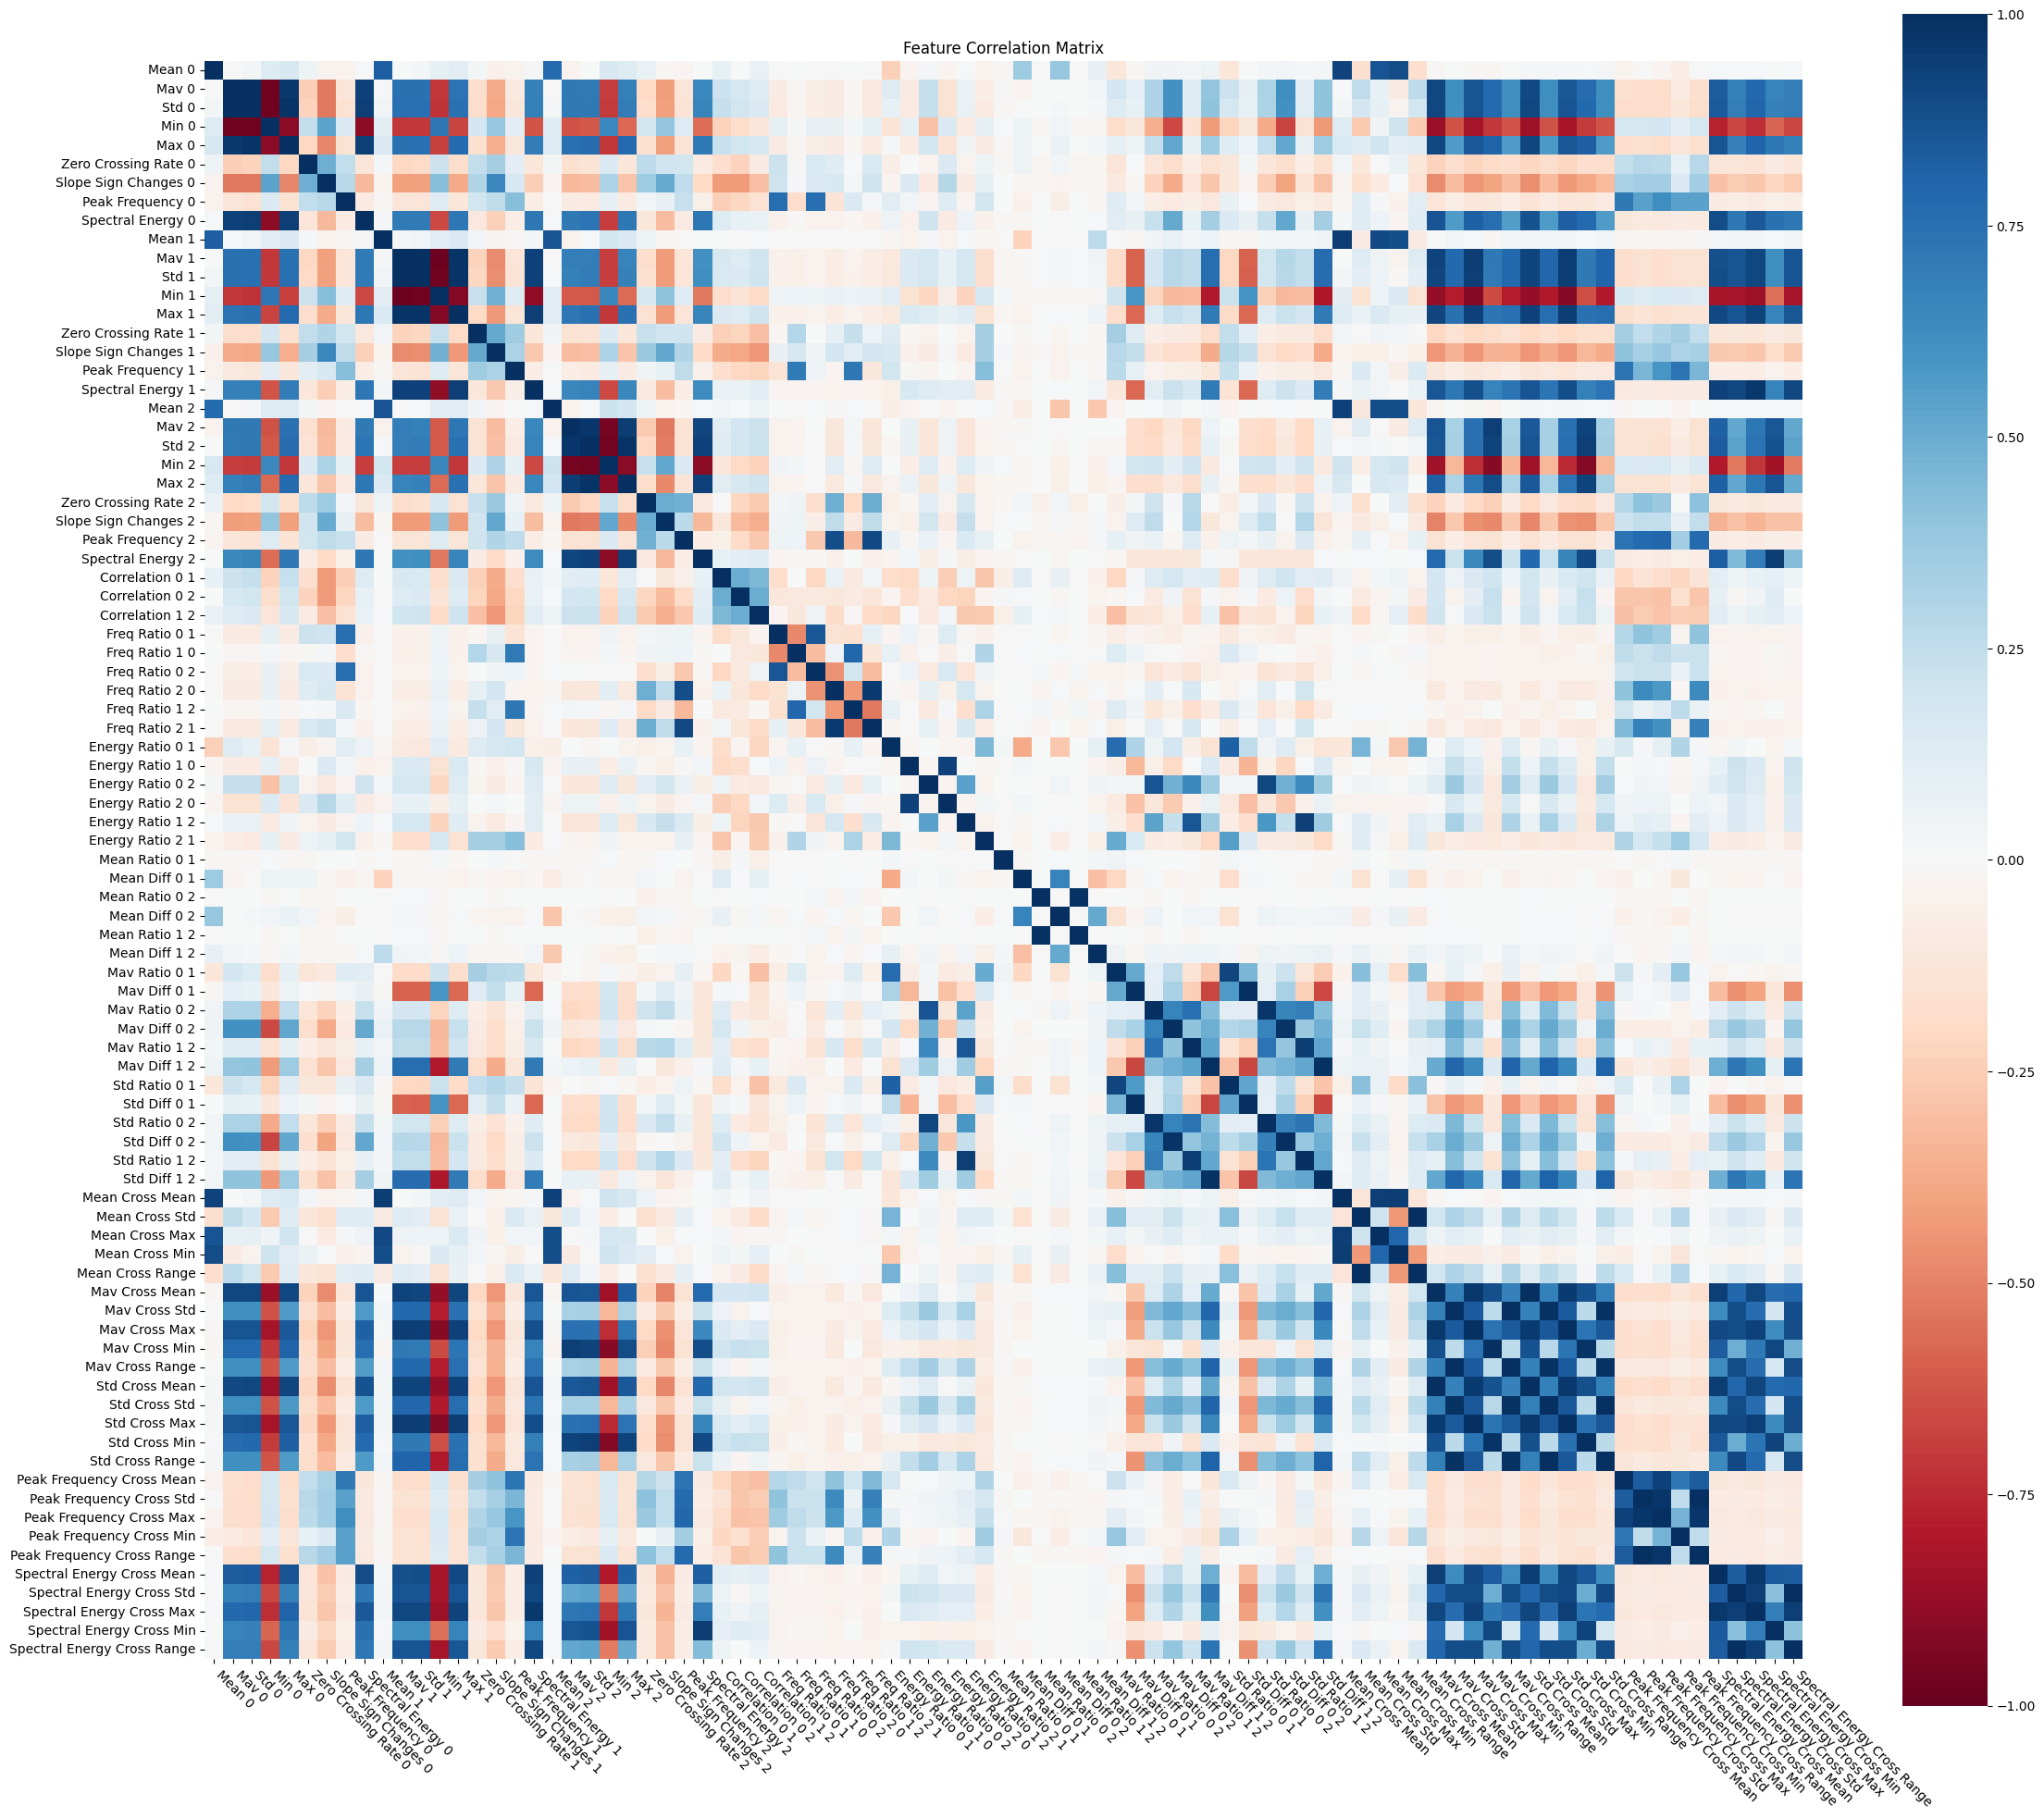

In [5]:
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42   
mpl.rcParams['ps.fonttype'] = 42

df = pd.read_csv("datasets/features_dataset_plus.csv")
df = df.drop(columns=["material", "location"])

corr = df.corr()

labels = [
    " ".join(word.capitalize() for word in col.replace("_", " ").split())
    for col in corr.columns
]
corr.index = labels
corr.columns = labels

plt.figure(figsize=(24, 20))
ax = sns.heatmap(corr, annot=False, cmap="RdBu", vmin=-1, vmax=1, square=True)
plt.title("Feature Correlation Matrix")
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45, ha='left')

plt.tight_layout()
plt.savefig("correlation_matrix.pdf", format="pdf", bbox_inches="tight")
plt.show()